## Import Required Libraries

In [1]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

## Random Seed 고정

In [2]:
# Random seed to make results deterministic and reproducible
torch.manual_seed(0)

## Min-Max Normalization 해주는 함수 구현

In [3]:
def minmax_scaler(data):
    numerator = data - np.min(data,0)
    denominator = np.max(data,0) - np.min(data,0)
    
    return numerator / (denominator + 1e-7)

## 시계열 Data를 Chunk 단위로 쪼개는 함수

In [4]:
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i:i+seq_length, :]
        _y = time_series[i+seq_length,[-1]]
        print(_x, "->", _y)
        dataX.append(_x)
        dataY.append(_y)
    
    return np.array(dataX), np.array(dataY)

## Hyper parameters

In [5]:
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

## Data Loading

In [6]:
# load data
xy = np.loadtxt("data-02-stock_daily.csv", delimiter=",")
xy = xy[::-1]  # reverse order

## Training Set, Test Set 나누고 Scaling

In [7]:
# split train-test set
train_size = int(len(xy) * 0.7)  # 70%
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]

# scaling data
train_set = minmax_scaler(train_set)
test_set = minmax_scaler(test_set)

## DataSet을 Chunk 단위로 나누기

In [8]:
# make train-test dataset to input
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

[[2.53065030e-01 2.45070970e-01 2.33983036e-01 4.66075110e-04
  2.32039560e-01]
 [2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.78314566e-01 1.98470380e-01 5.70171193e-01
  1.78104644e-01]] -> [0.16053716]
[[2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.7831

 [0.2615178  0.27021634 0.28266976 0.15208389 0.28548149]] -> [0.28453085]
[[0.1219612  0.13887484 0.14566655 0.0893699  0.15328475]
 [0.14231682 0.17096182 0.17142398 0.16294703 0.18067474]
 [0.16753705 0.20471584 0.19310045 0.20647127 0.22154824]
 [0.20559153 0.23387627 0.23391139 0.21530877 0.23182819]
 [0.22729284 0.25919179 0.25485388 0.19016761 0.27738423]
 [0.2615178  0.27021634 0.28266976 0.15208389 0.28548149]
 [0.26641704 0.276069   0.28800376 0.16750919 0.28453085]] -> [0.29143119]
[[0.14231682 0.17096182 0.17142398 0.16294703 0.18067474]
 [0.16753705 0.20471584 0.19310045 0.20647127 0.22154824]
 [0.20559153 0.23387627 0.23391139 0.21530877 0.23182819]
 [0.22729284 0.25919179 0.25485388 0.19016761 0.27738423]
 [0.2615178  0.27021634 0.28266976 0.15208389 0.28548149]
 [0.26641704 0.276069   0.28800376 0.16750919 0.28453085]
 [0.2772848  0.27879104 0.30733541 0.12384153 0.29143119]] -> [0.26451652]
[[0.16753705 0.20471584 0.19310045 0.20647127 0.22154824]
 [0.20559153 0.233876

 [0.73806945 0.73990424 0.76358361 0.20037645 0.74817624]] -> [0.72247638]
[[0.69132082 0.7046906  0.73920454 0.14174061 0.73353069]
 [0.73417084 0.73925773 0.76949052 0.17405216 0.75306984]
 [0.71347032 0.7227892  0.73752209 0.17938514 0.7157168 ]
 [0.67024063 0.69420717 0.69169948 0.17528906 0.72877806]
 [0.70850218 0.71455473 0.72680032 0.14648203 0.75057018]
 [0.73806945 0.73990424 0.76358361 0.20037645 0.74817624]
 [0.7095717  0.73126168 0.75219957 0.22167249 0.72247638]] -> [0.79654836]
[[0.73417084 0.73925773 0.76949052 0.17405216 0.75306984]
 [0.71347032 0.7227892  0.73752209 0.17938514 0.7157168 ]
 [0.67024063 0.69420717 0.69169948 0.17528906 0.72877806]
 [0.70850218 0.71455473 0.72680032 0.14648203 0.75057018]
 [0.73806945 0.73990424 0.76358361 0.20037645 0.74817624]
 [0.7095717  0.73126168 0.75219957 0.22167249 0.72247638]
 [0.72095695 0.75821032 0.75968165 0.19212154 0.79654836]] -> [0.7966891]
[[0.71347032 0.7227892  0.73752209 0.17938514 0.7157168 ]
 [0.67024063 0.6942071

## Data를 Tensor로 변환

In [9]:
# convert to tensor
trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

## RNN Model 

**Parameters**
- input_dim : RNN의 Input data
- hidden_dim : RNN의 Output data
- num_layers : 연속적으로 쌓을 (Stacking) 할 RNN의 갯수
- batch_first : batch dimension을 앞으로 가져온다

일반적으로 하나의 값을 예측할 때는 hidden_dim의 값을 적게하면 모델에 부담이 되므로,  
hidden_dim을 숫자를 좀 가져간 다음 마지막에 Fc layer로 하나의 값을 예측한다.

In [10]:
class Net(torch.nn.Module):
    def __init__(self,input_dim, hidden_dim, output_dim, layers):
        super(Net,self).__init__()  # Module을 상속 받는 것!
        self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers = layers, batch_first = True)
        self.fc = torch.nn.Linear(hidden_dim, output_dim, bias = True)
        
    def forward(self,x):
        x, _status = self.rnn(x)
        x = self.fc(x[:, -1])
        
        return x    

## Model 생성 및 Loss function, Optimizer 정의

In [11]:
# Model 생성
net = Net(data_dim, hidden_dim, output_dim,1)
# Loss function -> 실수값 이므로 MSELoss 사용
criterion = torch.nn.MSELoss()
# Optimizer
optimizer = optim.Adam(net.parameters(), lr = learning_rate)

## Training

In [12]:
# start training
for i in range(iterations):
    outputs = net(trainX_tensor)  # 결과 예측
    loss = criterion(outputs, trainY_tensor) # Loss 계산
    
    optimizer.zero_grad()    # 기울기 초기화
    loss.backward()          # Backpropagation
    optimizer.step()         # Weight Update
    print(i, loss.item())

0 0.2271038293838501
1 0.18341004848480225
2 0.15106485784053802
3 0.126123309135437
4 0.10598737746477127
5 0.08915026485919952
6 0.0749373659491539
7 0.0632796436548233
8 0.05449701473116875
9 0.0490250326693058
10 0.04693543538451195
11 0.0473177395761013
12 0.04838307201862335
13 0.04839528352022171
14 0.04633862152695656
15 0.04207932949066162
16 0.03620390594005585
17 0.029664460569620132
18 0.023388821631669998
19 0.018012959510087967
20 0.013801710680127144
21 0.01071511022746563
22 0.00853230245411396
23 0.006976467091590166
24 0.005824480205774307
25 0.0049874563701450825
26 0.004524606745690107
27 0.00455422094091773
28 0.005089024547487497
29 0.005919905845075846
30 0.006684020161628723
31 0.007072264328598976
32 0.006974083371460438
33 0.006472334265708923
34 0.005754034500569105
35 0.005015072878450155
36 0.004395428113639355
37 0.003953651990741491
38 0.0036764272954314947
39 0.0035107864532619715
40 0.003401215188205242
41 0.0033151342067867517
42 0.003248984692618251
4

341 0.0014232929097488523
342 0.0014217781135812402
343 0.0014202696038410068
344 0.0014187671476975083
345 0.0014172708615660667
346 0.001415780745446682
347 0.0014142964500933886
348 0.001412818324752152
349 0.0014113461365923285
350 0.0014098797691985965
351 0.0014084194554015994
352 0.0014069651952013373
353 0.0014055166393518448
354 0.0014040740206837654
355 0.001402637455612421
356 0.0014012069441378117
357 0.00139978202059865
358 0.0013983631506562233
359 0.0013969499850645661
360 0.0013955431059002876
361 0.001394142396748066
362 0.001392747275531292
363 0.0013913580914959311
364 0.001389975193887949
365 0.0013885984662920237
366 0.0013872279087081552
367 0.0013858634047210217
368 0.0013845048379153013
369 0.0013831531396135688
370 0.001381807611323893
371 0.0013804684858769178
372 0.001379135763272643
373 0.0013778097927570343
374 0.0013764903414994478
375 0.0013751777587458491
376 0.0013738716952502728
377 0.0013725730823352933
378 0.0013712813379243016
379 0.0013699965784326

## 예측값 Visualization

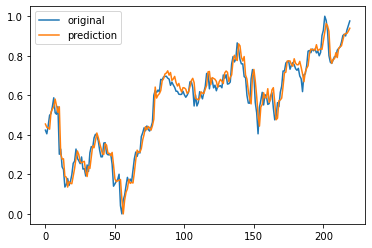

In [13]:
plt.plot(testY)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()